## Project Proposal - Group 35

### Introduction

The National Basketball Association (NBA) is a professional basketball league with 30 teams from the United States and Canada. Every year, teams play 82 games in the regular season followed by a best of 7 series in each round of the playoffs with the hopes of claiming the championship trophy.

We will analyze the NBA player stats for the 2017-18 season, which contains information about a player's position, 3 pointers made, games played, etc. for 490 unique players in the NBA, to try and determine whether there is a difference in the mean number of 3 point shots made per game by all Point Guards and Shooting Guards that have played in the NBA. We believe this question is critical as it could assist coaches in deciding where to play their finest three-point shooter. As such, our population of interest is comprised of all current and future point guards and shooting guards in the NBA. The data from this season is a random cluster sample, and is likely to be representative of the population.

As shown in the distribution plots (Figure 1.1), the data is normal enough that the mean and standard deviation are good choices for estimators. We will be testing the null hypothesis $\mu_1 - \mu_2 = 0$, where $\mu_1$ and $\mu_2$ are the average 3 point shots made by Point Guards and Shooting Guards respectively.

### Preliminary Data Analysis

In [1]:
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(broom)
library(digest)
library(testthat)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches




In [2]:
# Setting the seed
set.seed(35)

# Reading in the raw data
nba_stats <- read_csv("https://raw.githubusercontent.com/Ne1sonLi/STAT-201-Project-Group-35/main/players_stats.csv")

# Display the first 6 rows of the raw data
head(nba_stats)

Rows: 490 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): Name, Birth_Place, Birthdate, Collage, Experience, Pos, Team
dbl (27): Games Played, MIN, PTS, FGM, FGA, FG%, 3PM, 3PA, 3P%, FTM, FTA, FT...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,⋯,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
AJ Price,26,324,133,51,137,37.2,15,57,26.3,⋯,29,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.79839
Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,⋯,30,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.36111
Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,⋯,20,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.14266
Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,⋯,24,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.37775
Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,⋯,29,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.23438
Al Jefferson,65,1992,1082,486,1010,48.1,2,5,40.0,⋯,30,us,"January 4, 1985",NA,10,205.0,C,CHA,130.05,30.94587


In [3]:
# Filtering out observations that have NA
# Standardized by dividing 3 pointers made (3PM) by the games played (Games Played)
set.seed(35)
tidy_nba <- nba_stats |> 
    rename(pos = Pos) |>
    filter(pos == "PG" | pos == "SG") |>
    filter(!is.na('3PM') | !is.na('Games Played')) |>
    mutate(three_pts_standardized = `3PM`/ `Games Played`) |>
    select(pos, three_pts_standardized)

# Display first 6 rows of the tidy data
head(tidy_nba)

pos,three_pts_standardized
<chr>,<dbl>
PG,0.5769231
PG,1.4756098
SG,0.9864865
SG,0.9629630
SG,1.1190476
SG,0.5882353


In [4]:
# Summarizing the data frame
set.seed(35)
nba_summary <- tidy_nba |>
    group_by(pos) |>
    summarize(mean_three_pts = mean(three_pts_standardized),
              sd_three_pts = sd(three_pts_standardized),
              n = n(),
              mininum = min(three_pts_standardized),
              maximum = max(three_pts_standardized))

print("Table 1.1 : NBA Data Summary")
nba_summary

[1] "Table 1.1 : NBA Data Summary"


pos,mean_three_pts,sd_three_pts,n,mininum,maximum
<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
PG,0.8862508,0.6582483,84,0,3.575000
SG,1.0099519,0.7369353,100,0,3.103896


Here we see that the sample mean for Shooting Guards is slightly greater than the sample mean for Point Guards. However, Point Guards have a larger maximum value than Shoot Guards do. We also note that both sample sizes are sufficiently large for CLT to apply, but still less than 10% of the population so independence is not violated.

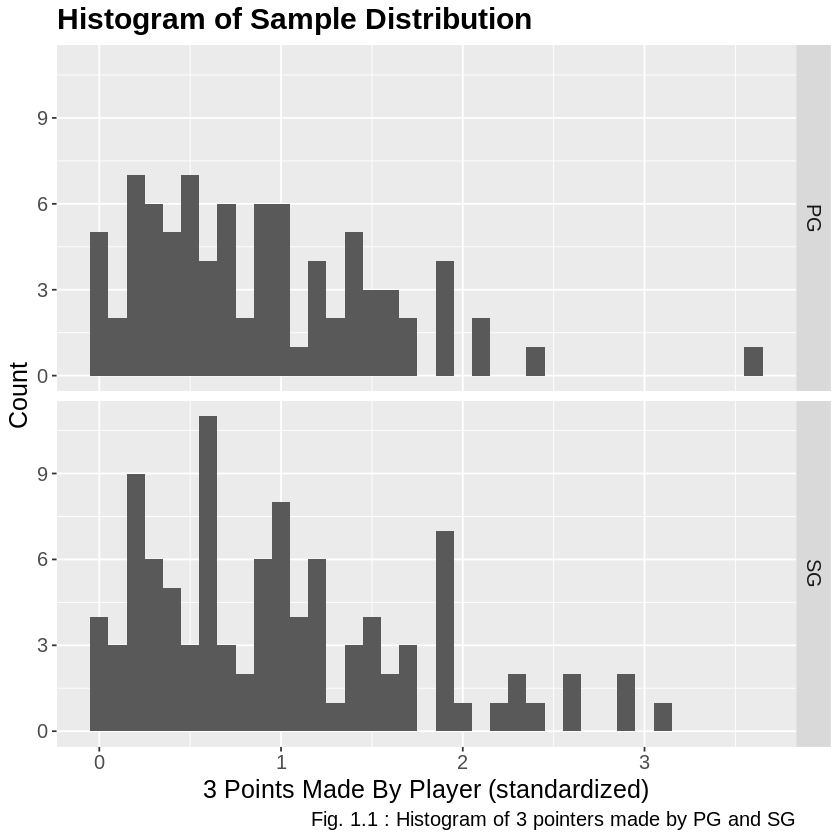

In [5]:
# Plotting the sample distribution using a histogram
options(repr.plot.width = 7, repr.plot.height = 7)
set.seed(35)
three_point_dist <- tidy_nba |> 
    ggplot(aes(x = three_pts_standardized)) + 
    geom_histogram(binwidth = .1) + 
    xlab("3 Points Made By Player (standardized)") +
    ylab("Count") +
    labs(caption = "Fig. 1.1 : Histogram of 3 pointers made by PG and SG") +
    facet_grid(rows = vars(pos)) + 
    ggtitle("Histogram of Sample Distribution") +
    theme(text = element_text(size = 15),
          plot.title = element_text(face = "bold"))

three_point_dist

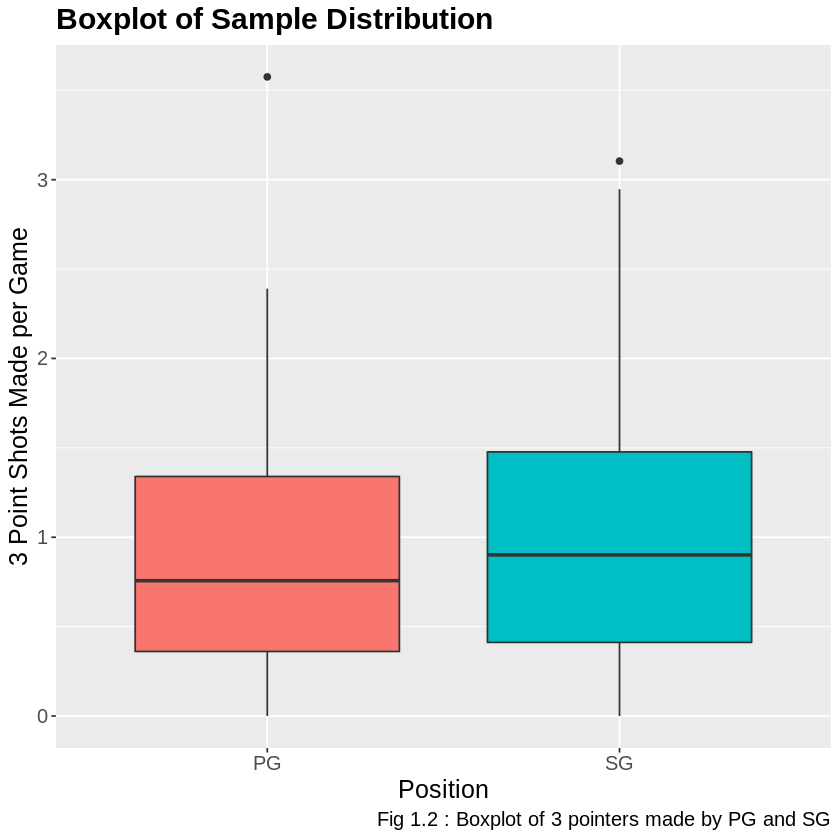

In [6]:
# Plotting the sample distribution using a histogram
options(repr.plot.width = 7, repr.plot.height = 7)
set.seed(35)
three_point_boxplot <- tidy_nba |> 
    ggplot(aes(x = pos, y = three_pts_standardized, fill = pos)) +
    geom_boxplot() + 
    ggtitle("Boxplot of Sample Distribution") +
    xlab("Position") +
    ylab("3 Point Shots Made per Game") +
    labs(caption = "Fig 1.2 : Boxplot of 3 pointers made by PG and SG") +
    guides(fill = "none") +
    theme(text = element_text(size = 15),
          plot.title = element_text(face = "bold"))

three_point_boxplot

### Methods

Since we are working with quantitative variables between two independent groups, we will use a difference in means ($\mu_1 - \mu_2$) as our point estimate. The data is collected through clustered sampling. Therefore, each NBA season is a subgroup with similar characteristics to the population so results drawn from a season should be generalizable to the population.

Due to sampling variability, simply concluding that Shooting Guards make more 3 pointers than Point Guards from this sample is not appropriate and very unconvincing. Thus, we will perform a hypothesis test at the 5% significance level. With bootstrapping, we will create a null distribution based on our null hypothesis and calculate the p-value of our test statistic. For the theory-based approach, we will construct a 95% confidence interval using the appropriate formula for standard error to see whether or not our test statistic falls within that confidence interval.

We expect to find that on average Shooting Guards make more 3 pointers than Point Guards as they tend to focus more on scoring. These findings could help teams when making decisions on the position of players to draft or sign during free agency.

Future questions this could lead to include:
1. How does height affect the number of 3 pointers made?
2. Which position has a better 3 point success percentage?

`summarise()` has grouped output by 'replicate'. You can override using the
`.groups` argument.
Adding missing grouping variables: `replicate`
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



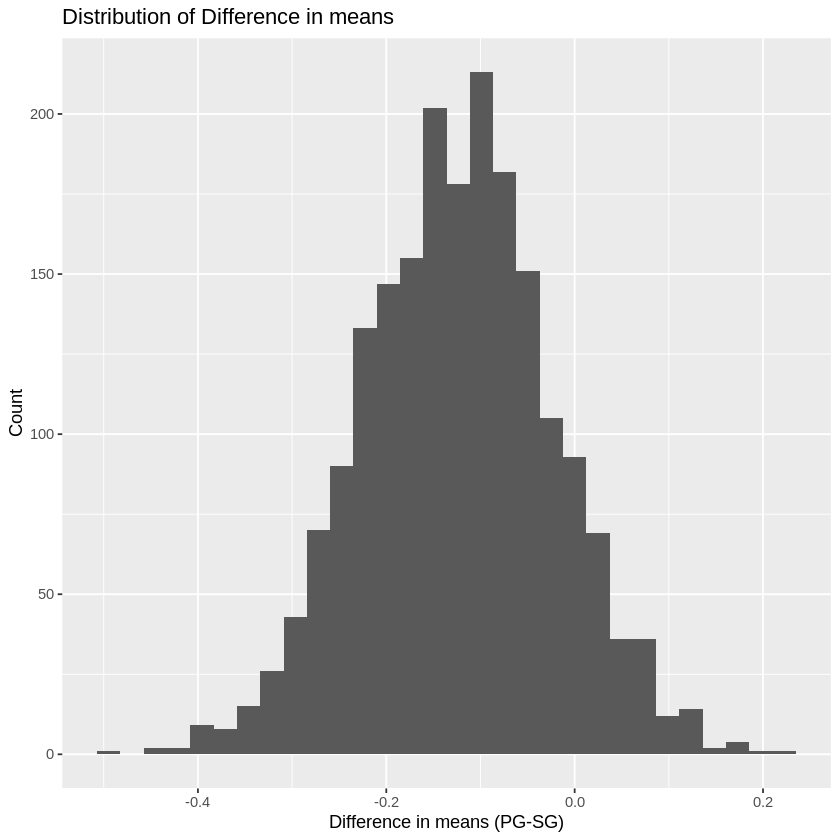

In [11]:
set.seed(35)
#Creating the bootstrap for the mean difference PG-SG
#first we will take 2000 bootstrapped samples
#we will calculate the mean for each group
#we will find the diffrence in the means from each sample
obs_stat <- nba_summary$maximum[1] - nba_summary$maximum[2]

bootstrap_data <- tidy_nba |>
rep_sample_n(size = 184 , reps = 2000 , replace = TRUE) |>
group_by(replicate,pos) |>
summarise(mean = mean(three_pts_standardized)) |>
pivot_wider(names_from = pos , values_from = mean) |>
mutate(diff_in_mean = PG-SG) |>

select(diff_in_mean)

bootstrap_dist <- bootstrap_data |>
ggplot(aes(x = diff_in_mean)) + geom_histogram() + xlab("Difference in means (PG-SG)") + 
ggtitle("Distribution of Difference in means") + ylab("Count")

bootstrap_dist


### References

1. Analysis of the final actions used in basketball during formative years ... (n.d.). Retrieved March 16, 2023, from https://www.researchgate.net/publication/255994752_Analysis_of_the_final_actions_used_in_basketball_during_formative_years_according_to_player's_position 

2. Camli, M. B. (2018, November 4). NBA Player stats 2017-2018. Kaggle. Retrieved March 16, 2023, from https://www.kaggle.com/datasets/mcamli/nba17-18 

3. Examining positional difference in basketball players’ field goal ... (n.d.). Retrieved March 16, 2023, from https://journals.sagepub.com/doi/abs/10.1177/17479541221096772 